In [47]:
import re
from collections import Counter
import liwc
import pandas as pd
import numpy as np

In [18]:
from nrclex import NRCLex

In [35]:
nrc_dicts = []

for i in list(df.Text):
    
    text_object = NRCLex(i)

    nrc_dicts.append(text_object.raw_emotion_scores)

In [36]:
k = []
for i in nrc_dicts:
    l = list(i.keys())
    k.extend(l)
    
k = set(k)

new_dicts = []
b = {}

for a in nrc_dicts:
    for i in list(k):  
        if i in a:
            b[i] = a[i]
        elif i not in a:
            b[i] = 0
        
    new_dicts.append(b)
    b = {}
        

In [34]:

nrc_dicts[20].raw_emotion_scores

{'trust': 1, 'anger': 1, 'fear': 1, 'negative': 1}

In [32]:
nrc_dicts[20].words

['kylekuzma',
 '🤣🤣🤣🤣🤣🤣🤣🤣',
 'I',
 'mean',
 'that',
 'show',
 'would',
 'be',
 'insane',
 'though']

In [37]:
nrc_df = pd.DataFrame(new_dicts)

In [40]:
df[["nrc_"+ i for i in list(nrc_df.keys())]] = nrc_df

In [44]:
df.to_csv("kingjames-with-nrc.csv")

In [62]:
df = pd.read_csv("kingjames-with-nrc.csv")

In [74]:
df.keys()

Index(['Unnamed: 0', 'Tweet Id', 'Text', 'Name', 'Screen Name', 'UTC',
       'Created At', 'Favorites', 'Retweets', 'Language',
       ...
       'nrc_negative', 'nrc_trust', 'nrc_fear', 'nrc_anticipation',
       'nrc_surprise', 'nrc_disgust', 'nrc_positive', 'nrc_sadness',
       'nrc_anger', 'nrc_joy'],
      dtype='object', length=104)

In [84]:
df_nrc = df[['nrc_trust', 'nrc_fear', 'nrc_anticipation',
       'nrc_surprise', 'nrc_disgust', 'nrc_sadness',
       'nrc_anger', 'nrc_joy']]

df_nrc_pn = df[['nrc_positive', 'nrc_negative']]

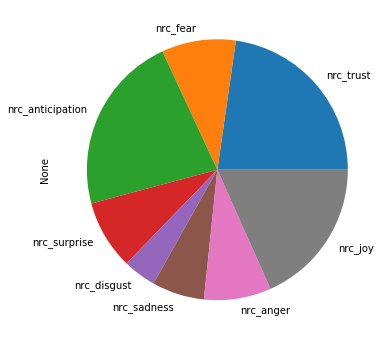

In [83]:
df_nrc.sum().plot(kind='pie',figsize=(11, 6))

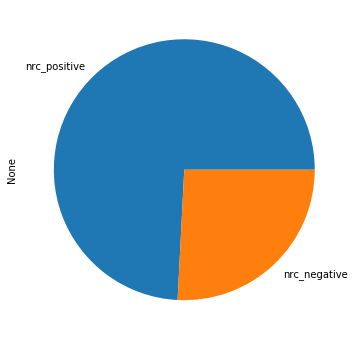

In [85]:
df_nrc_pn.sum().plot(kind='pie',figsize=(11, 6))

In [ ]:
df.sum().plot(kind='pie', y=['nrc_positive','nrc_negatve'])